In [1]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['Product Sales']
frame = ds.to_dataframe()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=frame

In [4]:
data.head()

,Age Range,Gender,Skin Type,Weather,Temperature,Product,Applied,Bought
0,20 - 29,M,AF/C,Sunny,13,Anthelios UV Light,481,289
1,30 - 39,M,AF/C,Sunny,12,Anthelios UV 30,721,476
2,40 - 49,M,AF/C,Sunny,13,Anthelios UV Light,428,385
3,50 - 59,M,AF/C,Sunny,12,Anthelios UV 30,384,342
4,60+,M,AF/C,Sunny,13,Anthelios UV 30,610,488


In [5]:
data1=data

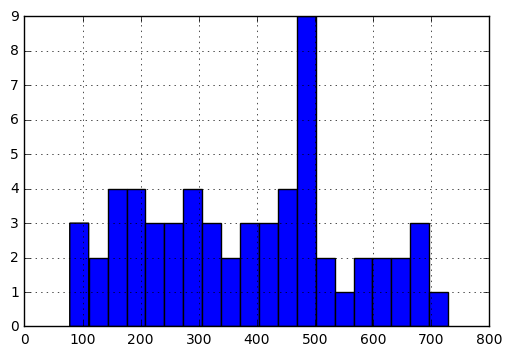

In [6]:
data1['Bought'].hist(bins=20)

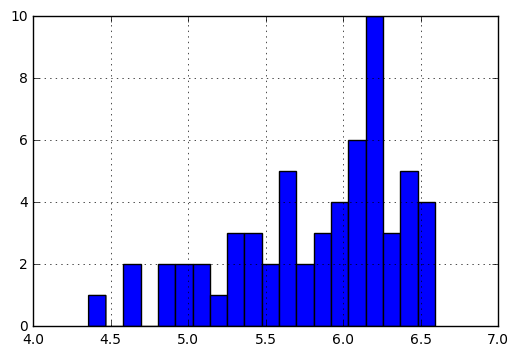

In [7]:
data1['Bought_log']=np.log(data1['Bought'])
data1['Bought_log'].hist(bins=20)

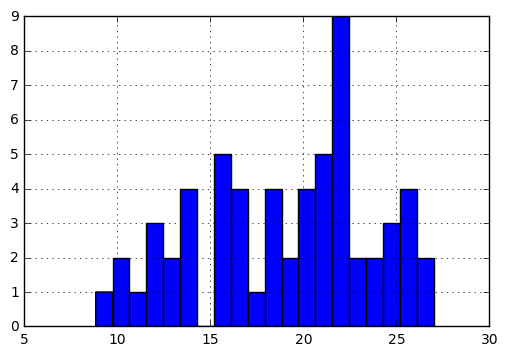

In [8]:
data1['Bought_sqrt']=np.sqrt(data1['Bought'])
data1['Bought_sqrt'].hist(bins=20)

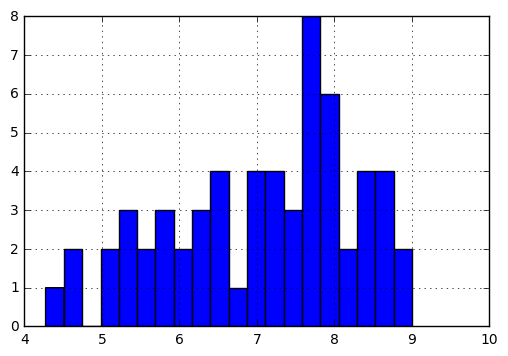

In [9]:
data1['Bought_cbrt']=np.cbrt(data1['Bought'])
data1['Bought_cbrt'].hist(bins=20)

In [10]:
data1.head()

,Age Range,Gender,Skin Type,Weather,Temperature,Product,Applied,Bought,Bought_log,Bought_sqrt,Bought_cbrt
0,20 - 29,M,AF/C,Sunny,13,Anthelios UV Light,481,289,5.666427,17.000000,6.611489
1,30 - 39,M,AF/C,Sunny,12,Anthelios UV 30,721,476,6.165418,21.817424,7.807925
2,40 - 49,M,AF/C,Sunny,13,Anthelios UV Light,428,385,5.953243,19.621417,7.274786
3,50 - 59,M,AF/C,Sunny,12,Anthelios UV 30,384,342,5.834811,18.493242,6.993191
4,60+,M,AF/C,Sunny,13,Anthelios UV 30,610,488,6.190315,22.090722,7.872994


In [11]:
data1.describe()

,Temperature,Applied,Bought,Bought_log,Bought_sqrt,Bought_cbrt
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,16.400000,483.666667,381.650000,5.816839,18.969958,7.061344
std,3.552035,206.653289,172.962113,0.548858,4.707442,1.206957
min,8.000000,106.000000,78.000000,4.356709,8.831761,4.272659
25%,13.750000,316.500000,236.250000,5.464875,15.370368,6.181907
50%,17.000000,524.000000,392.000000,5.971259,19.798974,7.318606
75%,20.000000,665.750000,490.750000,6.195888,22.152619,7.887673
max,23.000000,786.000000,729.000000,6.591674,27.000000,9.000000


In [14]:
data1.keys()

Index(['Age Range', 'Gender', 'Skin Type', 'Weather', 'Temperature', 'Product',
       'Applied', 'Bought', 'Bought_log', 'Bought_sqrt', 'Bought_cbrt'],
      dtype='object')

In [15]:
data=data1.drop(['Bought_log', 'Bought_sqrt', 'Bought_cbrt'],axis=1)

In [16]:
data.shape

(60, 8)

In [17]:
data.isnull().sum()

Age Range      0
Gender         0
Skin Type      0
Weather        0
Temperature    0
Product        0
Applied        0
Bought         0
dtype: int64

In [18]:
data.columns

Index(['Age Range', 'Gender', 'Skin Type', 'Weather', 'Temperature', 'Product',
       'Applied', 'Bought'],
      dtype='object')

In [19]:
data=data.rename(columns={"Age Range":"Age_Range","Skin Type":"skin_type"})
data.head()

,Age_Range,Gender,skin_type,Weather,Temperature,Product,Applied,Bought
0,20 - 29,M,AF/C,Sunny,13,Anthelios UV Light,481,289
1,30 - 39,M,AF/C,Sunny,12,Anthelios UV 30,721,476
2,40 - 49,M,AF/C,Sunny,13,Anthelios UV Light,428,385
3,50 - 59,M,AF/C,Sunny,12,Anthelios UV 30,384,342
4,60+,M,AF/C,Sunny,13,Anthelios UV 30,610,488


In [20]:
data.columns

Index(['Age_Range', 'Gender', 'skin_type', 'Weather', 'Temperature', 'Product',
       'Applied', 'Bought'],
      dtype='object')

In [21]:
data['Age_Range'].value_counts()

40 - 49    12
50 - 59    12
20 - 29    12
30 - 39    12
60+        12
Name: Age_Range, dtype: int64

In [22]:
data['Gender'].value_counts()

M    30
F    30
Name: Gender, dtype: int64

In [23]:
data['skin_type'].value_counts()

EU/W    30
AF/C    30
Name: skin_type, dtype: int64

In [24]:
data['Weather'].value_counts()

Cloudy    20
Sunny     20
Rainy     20
Name: Weather, dtype: int64

In [25]:
data['Product'].value_counts()

Anthelios UV Neutral    29
Anthelios UV 30         16
Anthelios UV Light      15
Name: Product, dtype: int64

In [26]:
data.describe()

,Temperature,Applied,Bought
count,60.000000,60.000000,60.000000
mean,16.400000,483.666667,381.650000
std,3.552035,206.653289,172.962113
min,8.000000,106.000000,78.000000
25%,13.750000,316.500000,236.250000
50%,17.000000,524.000000,392.000000
75%,20.000000,665.750000,490.750000
max,23.000000,786.000000,729.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
Age_Range      60 non-null object
Gender         60 non-null object
skin_type      60 non-null object
Weather        60 non-null object
Temperature    60 non-null int64
Product        60 non-null object
Applied        60 non-null int64
Bought         60 non-null int64
dtypes: int64(3), object(5)
memory usage: 3.8+ KB


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data.columns

Index(['Age_Range', 'Gender', 'skin_type', 'Weather', 'Temperature', 'Product',
       'Applied', 'Bought'],
      dtype='object')

In [30]:
df=pd.get_dummies(data,columns=['Age_Range', 'Gender', 'skin_type', 'Weather','Product'],drop_first=True)
df.head()

,Temperature,Applied,Bought,Age_Range_30 - 39,Age_Range_40 - 49,Age_Range_50 - 59,Age_Range_60+,Gender_M,skin_type_EU/W,Weather_Rainy,Weather_Sunny,Product_Anthelios UV Light,Product_Anthelios UV Neutral
0,13,481,289,0,0,0,0,1,0,0,1,1,0
1,12,721,476,1,0,0,0,1,0,0,1,0,0
2,13,428,385,0,1,0,0,1,0,0,1,1,0
3,12,384,342,0,0,1,0,1,0,0,1,0,0
4,13,610,488,0,0,0,1,1,0,0,1,0,0


In [31]:
df.columns

Index(['Temperature', 'Applied', 'Bought', 'Age_Range_30 - 39',
       'Age_Range_40 - 49', 'Age_Range_50 - 59', 'Age_Range_60+', 'Gender_M',
       'skin_type_EU/W', 'Weather_Rainy', 'Weather_Sunny',
       'Product_Anthelios UV Light', 'Product_Anthelios UV Neutral'],
      dtype='object')

In [32]:
df.shape

(60, 13)

In [33]:
corr=df.corr()
corr.nlargest(13,'Bought')['Bought']

Bought                          1.000000
Applied                         0.937789
Age_Range_50 - 59               0.174475
Weather_Rainy                   0.174185
Age_Range_60+                   0.064426
Product_Anthelios UV Light      0.055037
skin_type_EU/W                 -0.030027
Temperature                    -0.058889
Gender_M                       -0.064232
Age_Range_40 - 49              -0.072346
Age_Range_30 - 39              -0.144983
Weather_Sunny                  -0.154190
Product_Anthelios UV Neutral   -0.229233
Name: Bought, dtype: float64

In [34]:
x=df[[ 'Applied', 'Age_Range_30 - 39',
       'Age_Range_40 - 49', 'Age_Range_50 - 59', 'Age_Range_60+', 'Gender_M',
       'skin_type_EU/W', 'Weather_Rainy', 'Weather_Sunny',
       'Product_Anthelios UV Light', 'Product_Anthelios UV Neutral']].values
y=df.Bought

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
from sklearn.linear_model import LinearRegression

In [36]:
reg=LinearRegression()

In [37]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
x_train.shape

(42, 11)

In [39]:
x_test.shape

(18, 11)

In [40]:
y_train.shape

(42,)

In [41]:
y_test.shape

(18,)

In [42]:
y_pred=reg.predict(x_test)
y_pred

array([ 558.58828217,  595.01365571,  114.82967113,  182.1681569 ,
        245.7646264 ,  535.23659609,  473.5328181 ,  261.05163282,
        134.33263969,  596.10746409,  454.18591609,  391.70909679,
        314.80172254,   88.50485805,  212.62835341,  494.75107199,
        314.08345445,  363.32630363])

In [43]:
reg.coef_

array([  0.81456357, -29.90978704, -14.5908792 ,  33.08181294,
        34.61926758,  -1.54640918, -18.5967325 ,  -9.7087203 ,
       -34.8513909 ,  11.11362711,   8.6845071 ])

In [44]:
reg.intercept_

5.3253000564423587

In [45]:
from sklearn.metrics import r2_score

In [56]:
score=r2_score(y_pred,y_test)
score

0.86589922599109137

In [46]:
train_score=reg.score(x_train,y_train)
train_score

0.91273696261109705

In [47]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 50.0495815251
Mean Squared Error: 3619.95193597
Root Mean Squared Error: 60.1660363991


In [48]:
dataframe=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
dataframe

,Actual,Predicted
31,475,558.588282
42,469,595.013656
34,98,114.829671
52,193,182.168157
56,279,245.764626
19,464,535.236596
43,482,473.532818
26,272,261.051633
23,101,134.332640
28,566,596.107464
